# Gaussowski Naiwny Klasyfikator Bayesa

In [37]:
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.model_selection import train_test_split
import random
import numpy as np
from matplotlib import pyplot as plt
from naive_bayes_classificator import naive_bayes, accuracy_metric
from bayesian_linear_regression import BayesianLinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('seaborn-whitegrid')

## Implementacja
Implementacja jest schowana w pliku naive_bayes_classificator.py dla przejrzystości notabooka.

In [38]:
def naive_bayesian(X, y, tests, title):
    accuracy = 0
    for i in range(0, tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random.randint(0, 100))
        accuracy += accuracy_metric(naive_bayes(X_train, y_train, X_test, y_test), y_test)
    print("\n==== " + title + " ====")
    print("Accuracy: " + str(accuracy / tests))
    print("====================")

## Testy na zbiorze Iris
Przetestuj działanie własnej implementacji klasyfikatora dla zbioru danych Iris (4 cechy). Zastosuj losowy podział zbioru danych na część trenignową i testową według proporcji 0.6, 0.4. Powtórz eksperyment 20-krotnie i zmierz średni błąd klasyfikacji i jego odchylenie standardowe.

In [39]:
X, y = load_iris(return_X_y=True)
naive_bayesian(X, y, 100, "Iris")


==== Iris ====
Accuracy: 95.20000000000002


## Testy na zbiorze Wine
Przeszedłem do testów na nowym zbiorze o większej liczbie cech

### Bez skalowania cech
Pierwsza wersja testu odbywa się na niezmodyfikowanych danych

In [40]:
X, y = load_wine(return_X_y=True)
naive_bayesian(X, y, 100, "Wine STANDARD")


==== Wine STANDARD ====
Accuracy: 97.263888888889


### Z standardowym skalowaniem cech
Zastosowanie skalowania cech (średnia 0, odchylenie 1)

In [41]:
X, y = load_wine(return_X_y=True)
X_scalar = StandardScaler().fit_transform(X)
naive_bayesian(X_scalar, y, 100, "Wine SCALAR")


==== Wine SCALAR ====
Accuracy: 97.00000000000009


### Z skalowaniem PCA
Zmiana liczby wymiarów do dwóch

In [42]:
X, y = load_wine(return_X_y=True)
X_scalar = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scalar)
naive_bayesian(X_pca, y, 100, "Wine PCA")


==== Wine PCA ====
Accuracy: 95.87500000000006


# Liniowa Regresja Bayesowska online

### Implementacja liniowej regresji bayesowskiej
Implementacja jest ukryta w pliku bayesian_linear_regression.py.

### Przetestowanie na zbiorze Boston
Sprawdzenie działania klasyfikatora na zbiorze Boston z alfa = 0.3 i beta = 1

In [43]:
X, y = load_boston(return_X_y=True)
linear_bayes = BayesianLinearRegression(n_features=X.shape[1], alpha=.3, beta=1)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Predykcje na modelu w trakcie treningu
Początkowo wziąłem nowy model i w trakcie uczenia patrzyłem jak zmienia się dokładność przewidywanej ceny domu

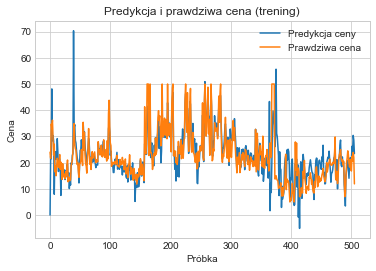

In [44]:
def prediction_while_train():
    y_pred = np.empty(len(y))
    for i, (ix, iy) in enumerate(zip(X, y)):
        y_pred[i] = linear_bayes.predict(ix).mean()
        linear_bayes.learn(ix, iy)
    return y_pred


y_pred = prediction_while_train()
plt.plot(range(len(y)), y_pred, label="Predykcja ceny")
plt.plot(range(len(y)), y, label="Prawdziwa cena")
plt.xlabel("Próbka")
plt.ylabel("Cena")
plt.legend()
plt.title("Predykcja i prawdziwa cena (trening)")
plt.show()

### Błąd bezwzględny
Na podstawie predykcji sprawdziłem średni błąd. Jak widać błąd początkowo spadł, a następnie utrzymuje się na stabilnym i akceptowalnym poziomie. Niektóre odchyły spowodowane są wyjątkowo dużą ceną, którą trudno jest przewidzieć.

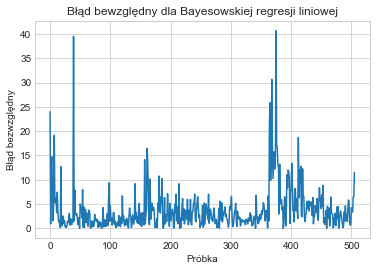

In [45]:
plt.plot(range(len(y)), np.abs(y - y_pred))
plt.title("Błąd bewzględny dla Bayesowskiej regresji liniowej")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("Próbka")
plt.show()

### Błąd względny
Sprawdziłem również błąd względny, który może dawać lepszy obraz.

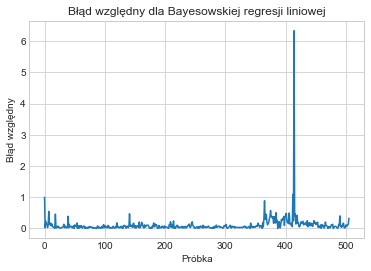

In [46]:
plt.plot(range(len(y)), np.abs(y - y_pred) / (y + y_pred))
plt.title("Błąd względny dla Bayesowskiej regresji liniowej")
plt.ylabel("Błąd względny")
plt.xlabel("Próbka")
plt.show()

### Predykcje na modelu przetrenowanym
Dodatkowo uruchomiłem predykcję dla modelu już przetrowanego - widać, że wykresy mają podobny przebieg, co oznacza, że model na pierwszy rzut oka sprawdza.

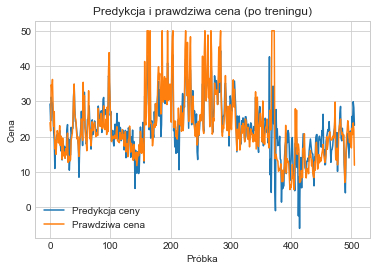

In [47]:
plt.plot(range(len(y)), [linear_bayes.predict(x).mean() for x in X], label="Predykcja ceny")
plt.plot(range(len(y)), y, label="Prawdziwa cena")
plt.xlabel("Próbka")
plt.ylabel("Cena")
plt.legend()
plt.title("Predykcja i prawdziwa cena (po treningu)")
plt.show()

## Generowanie sztucznego zbioru
Wygeneruj sztuczny zbiór danych w 2D (10 punktów z przedziału [−1, 1]) zgodnie ze wzorem t = −0.2 + 0.6x + ε, gdzie ε jest szumem Gaussowskim o średniej 0 i odchyleniu standardowym 0.2.

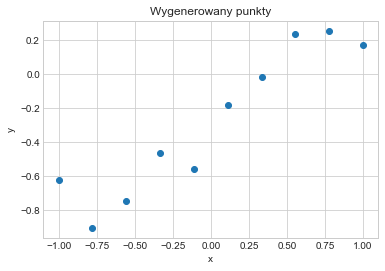

In [48]:
def generate_points_with_noise(size):
    pure = np.linspace(-1, 1, size)
    noise = np.random.normal(0, 0.2, size)
    return [[p, -0.2 + 0.6 * p + n] for (p, n) in zip(pure, noise)]

Xy = list(zip(*generate_points_with_noise(10)))
plt.title("Wygenerowany punkty")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(Xy[0], Xy[1])
plt.show()

## Wizualizacji BLR
Zwizualizuj kolejne kroki Liniowej Regresji Bayesowskiej online (β = 25, α = 2) dla pierwszych 7 punktów ze zbioru danych.

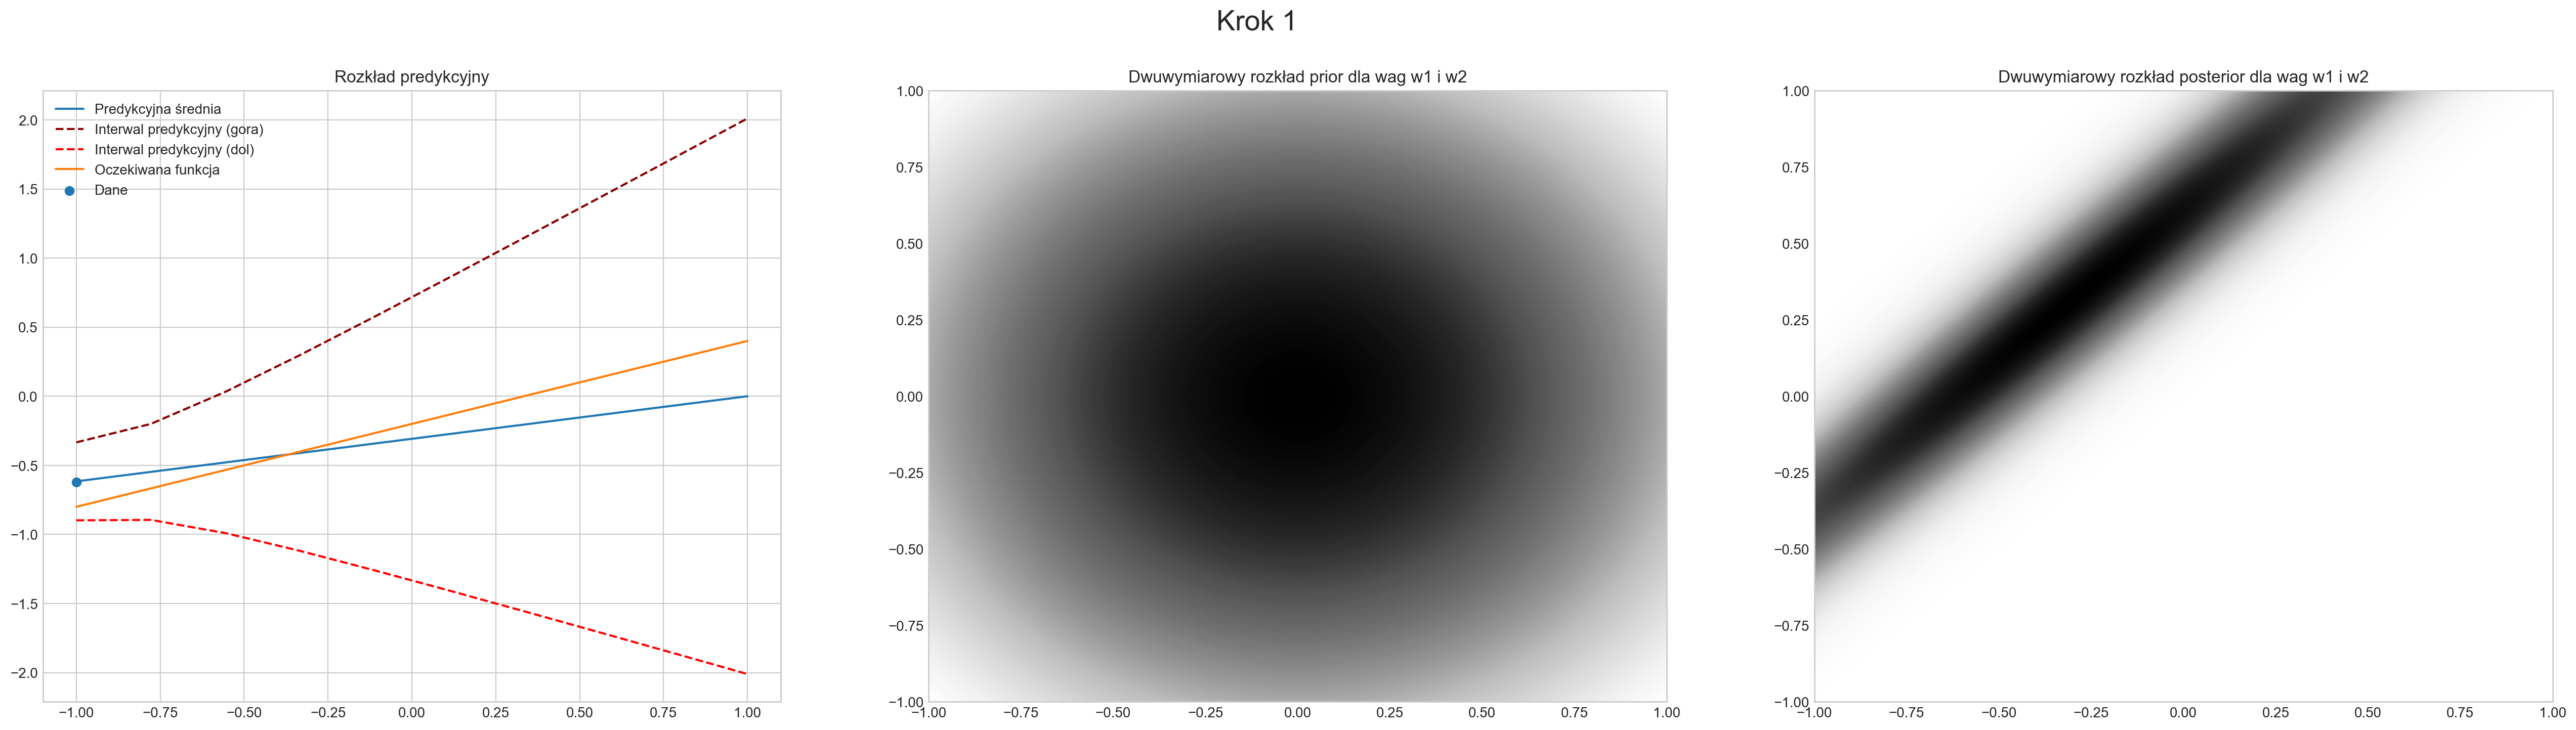

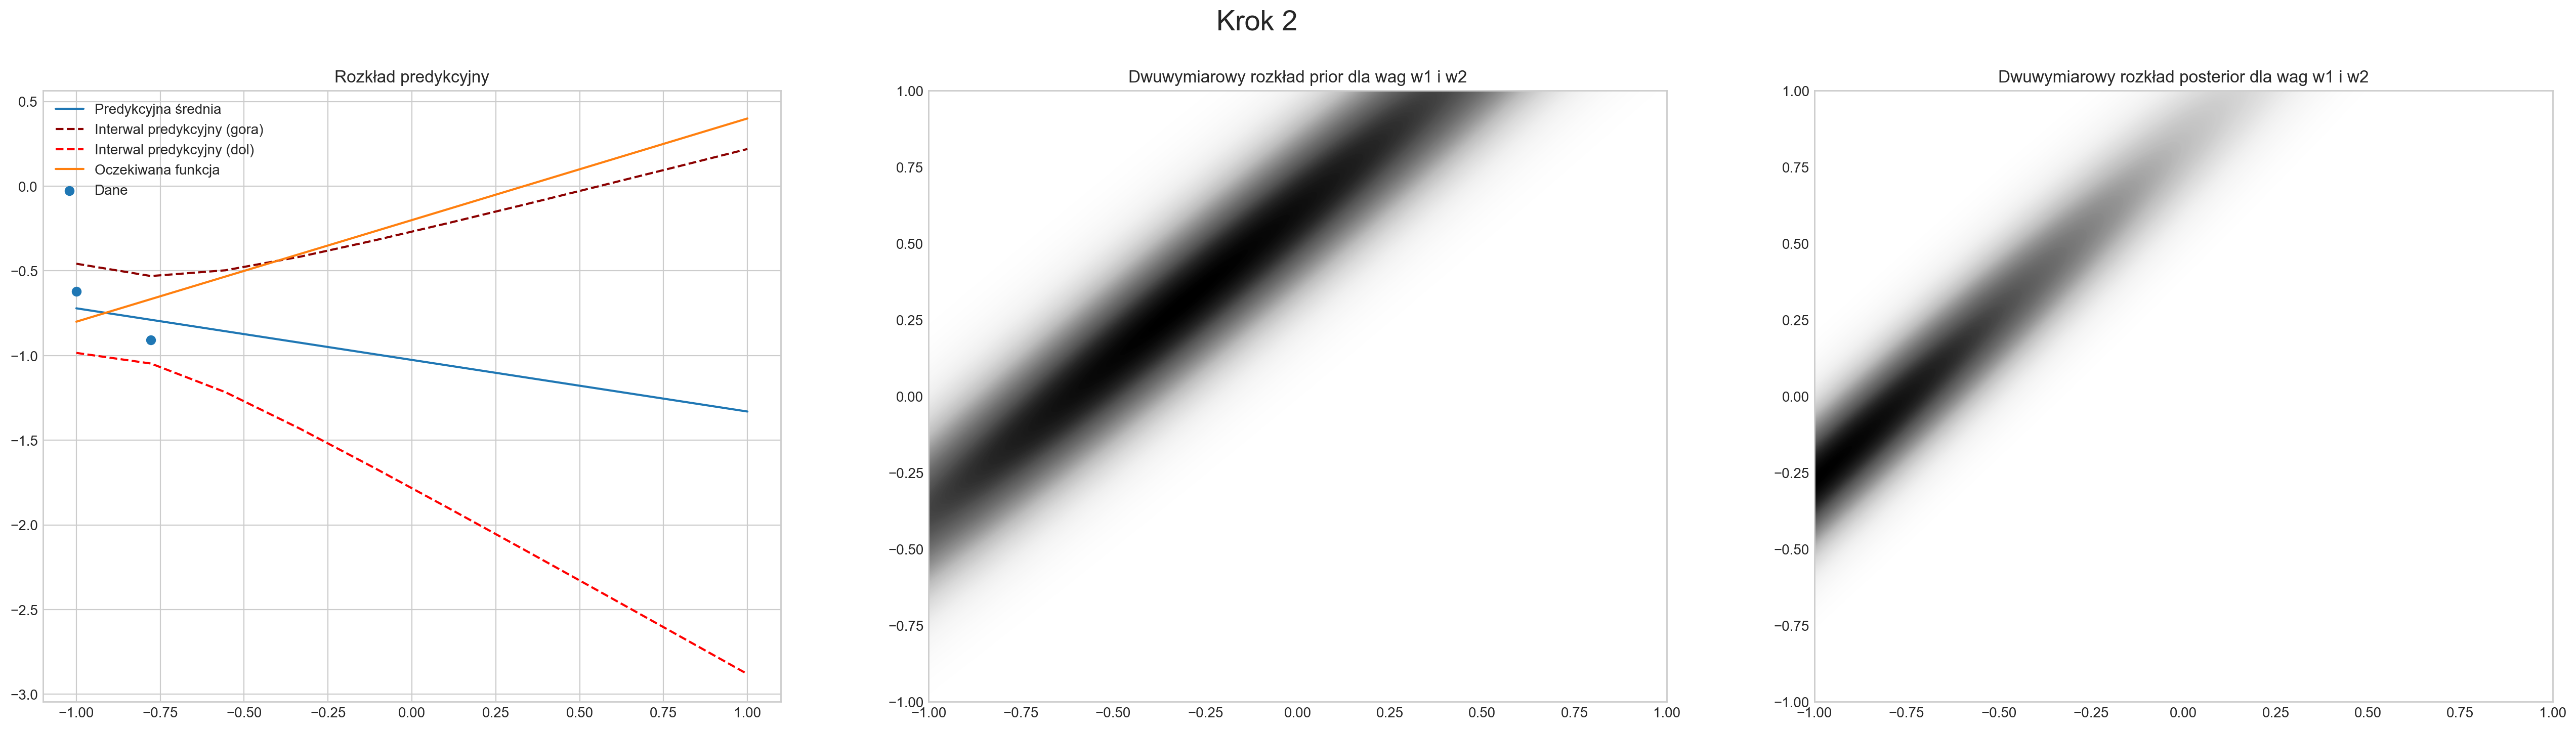

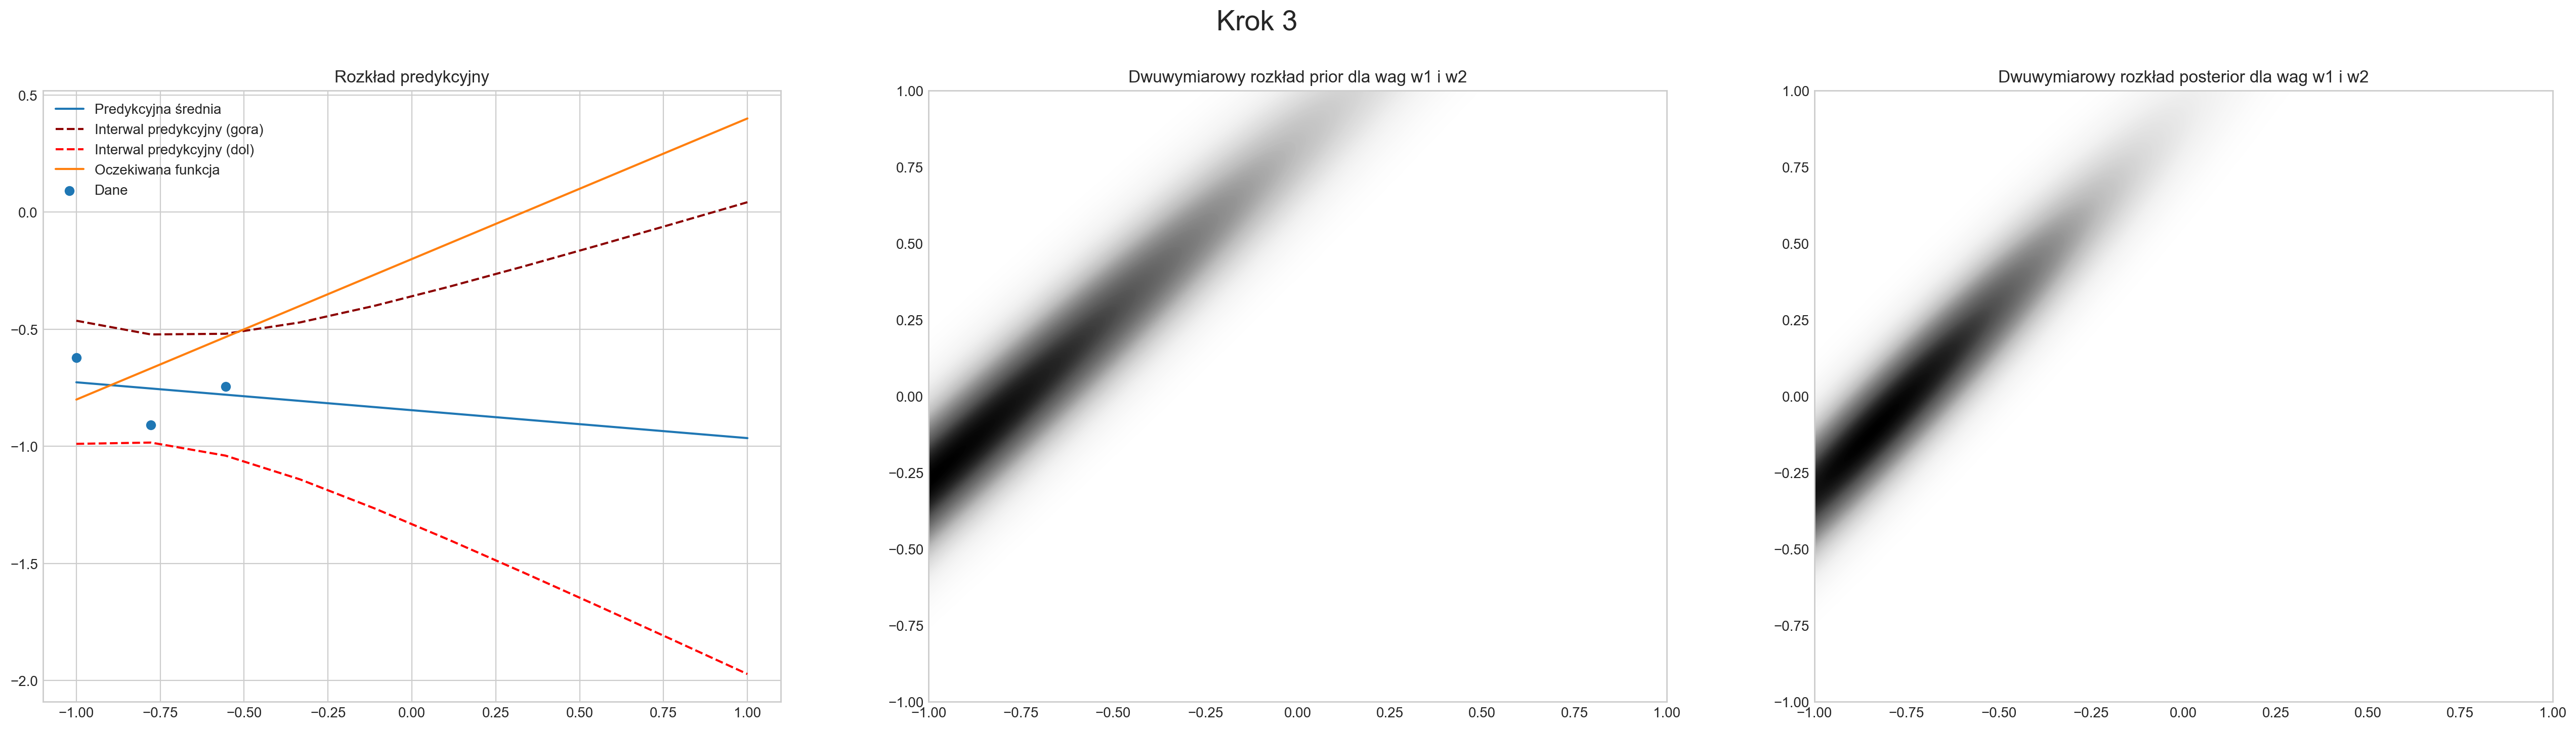

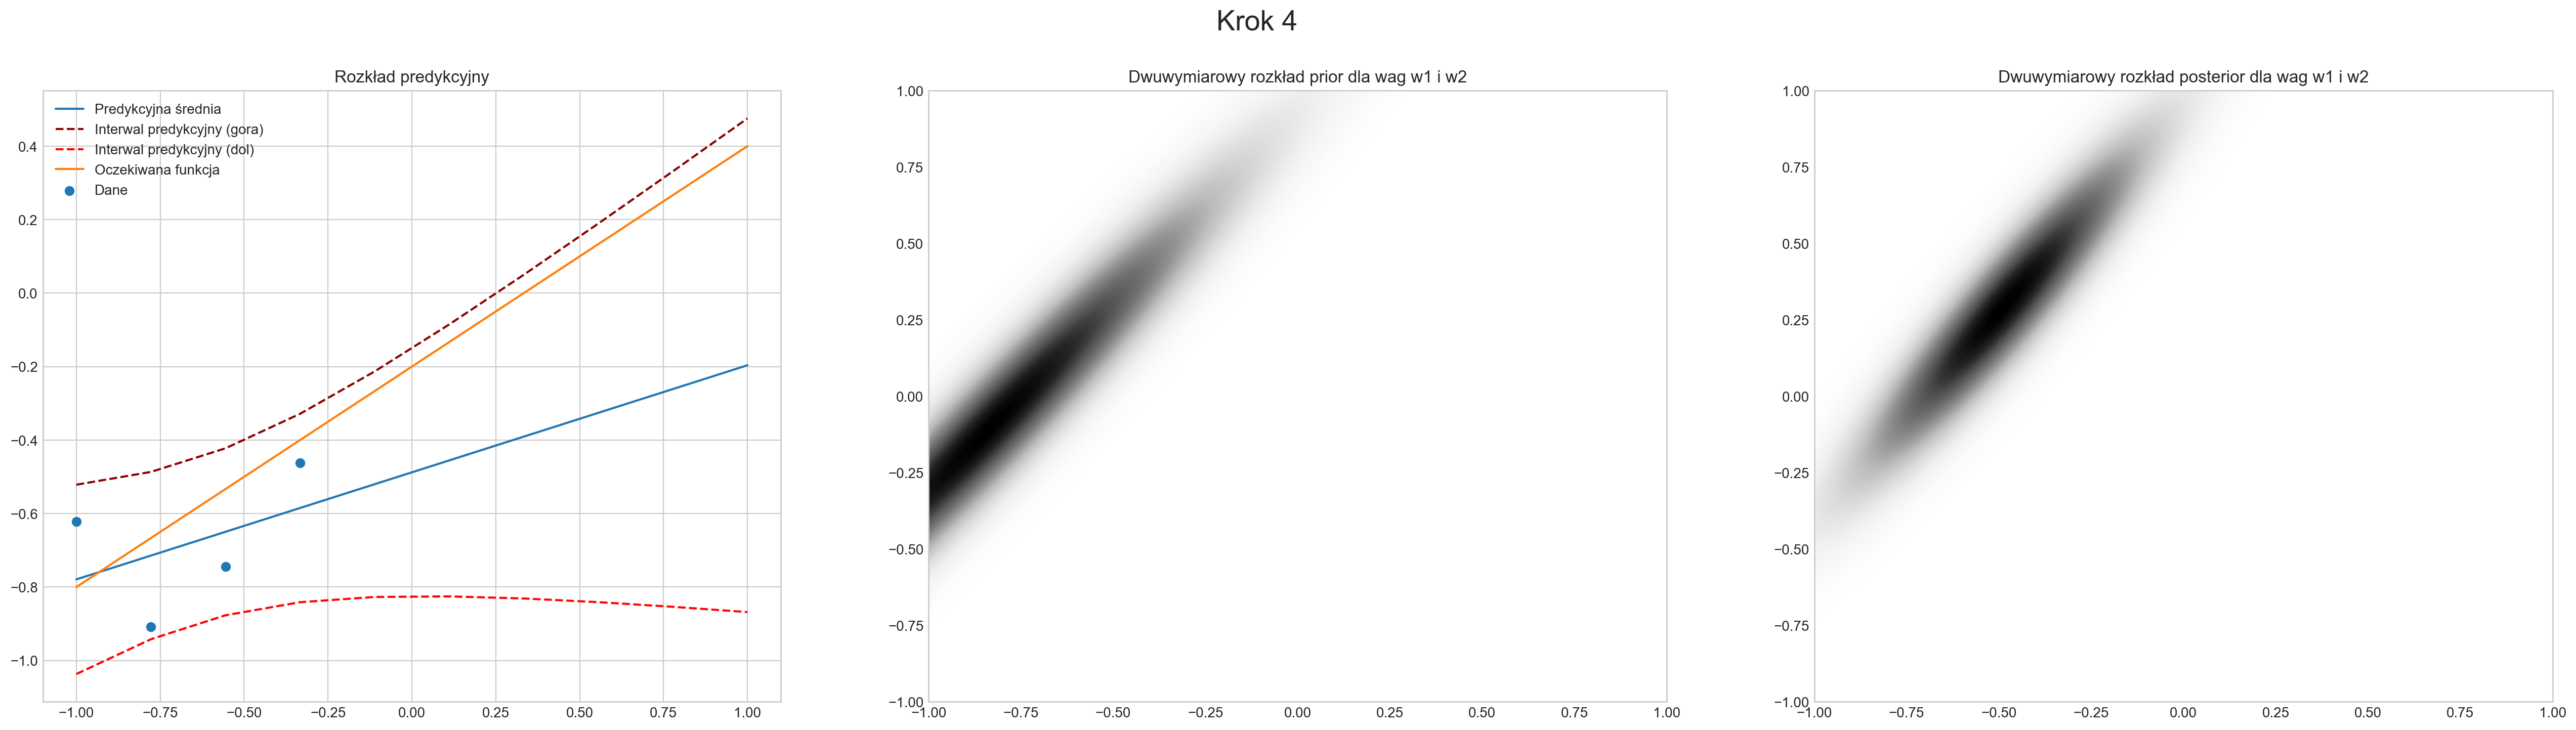

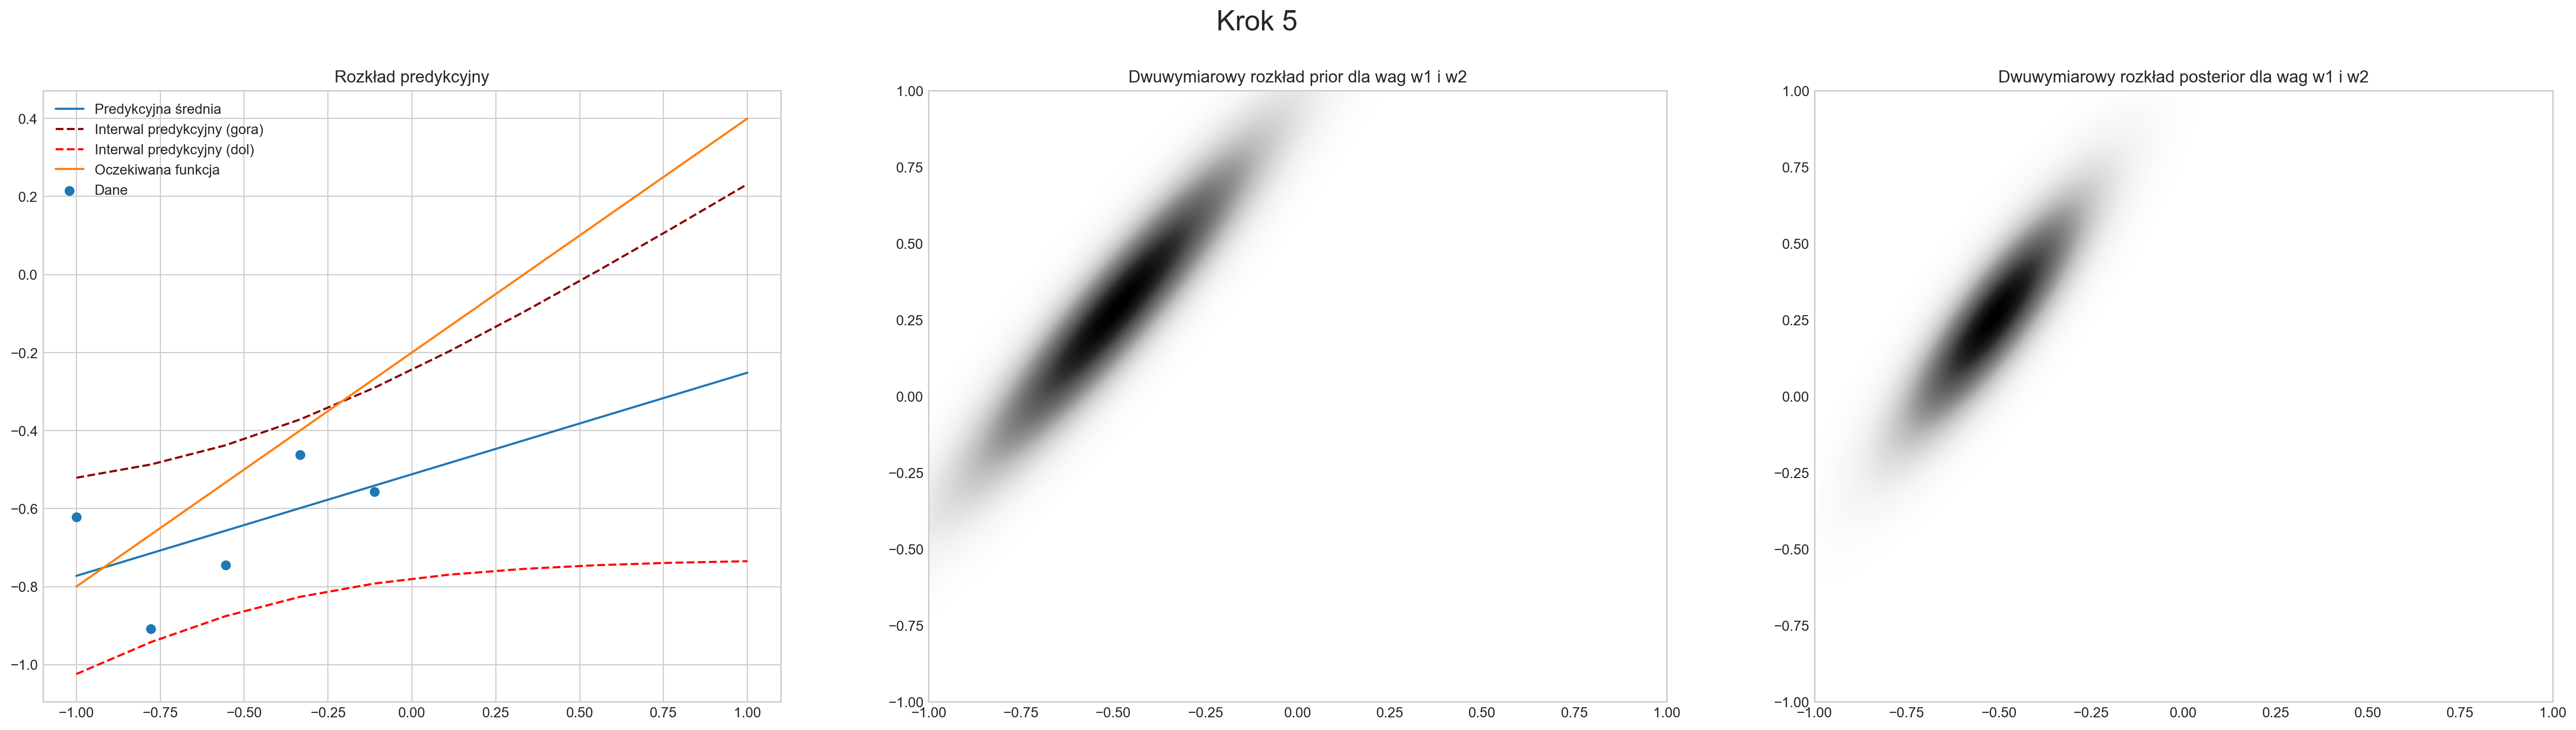

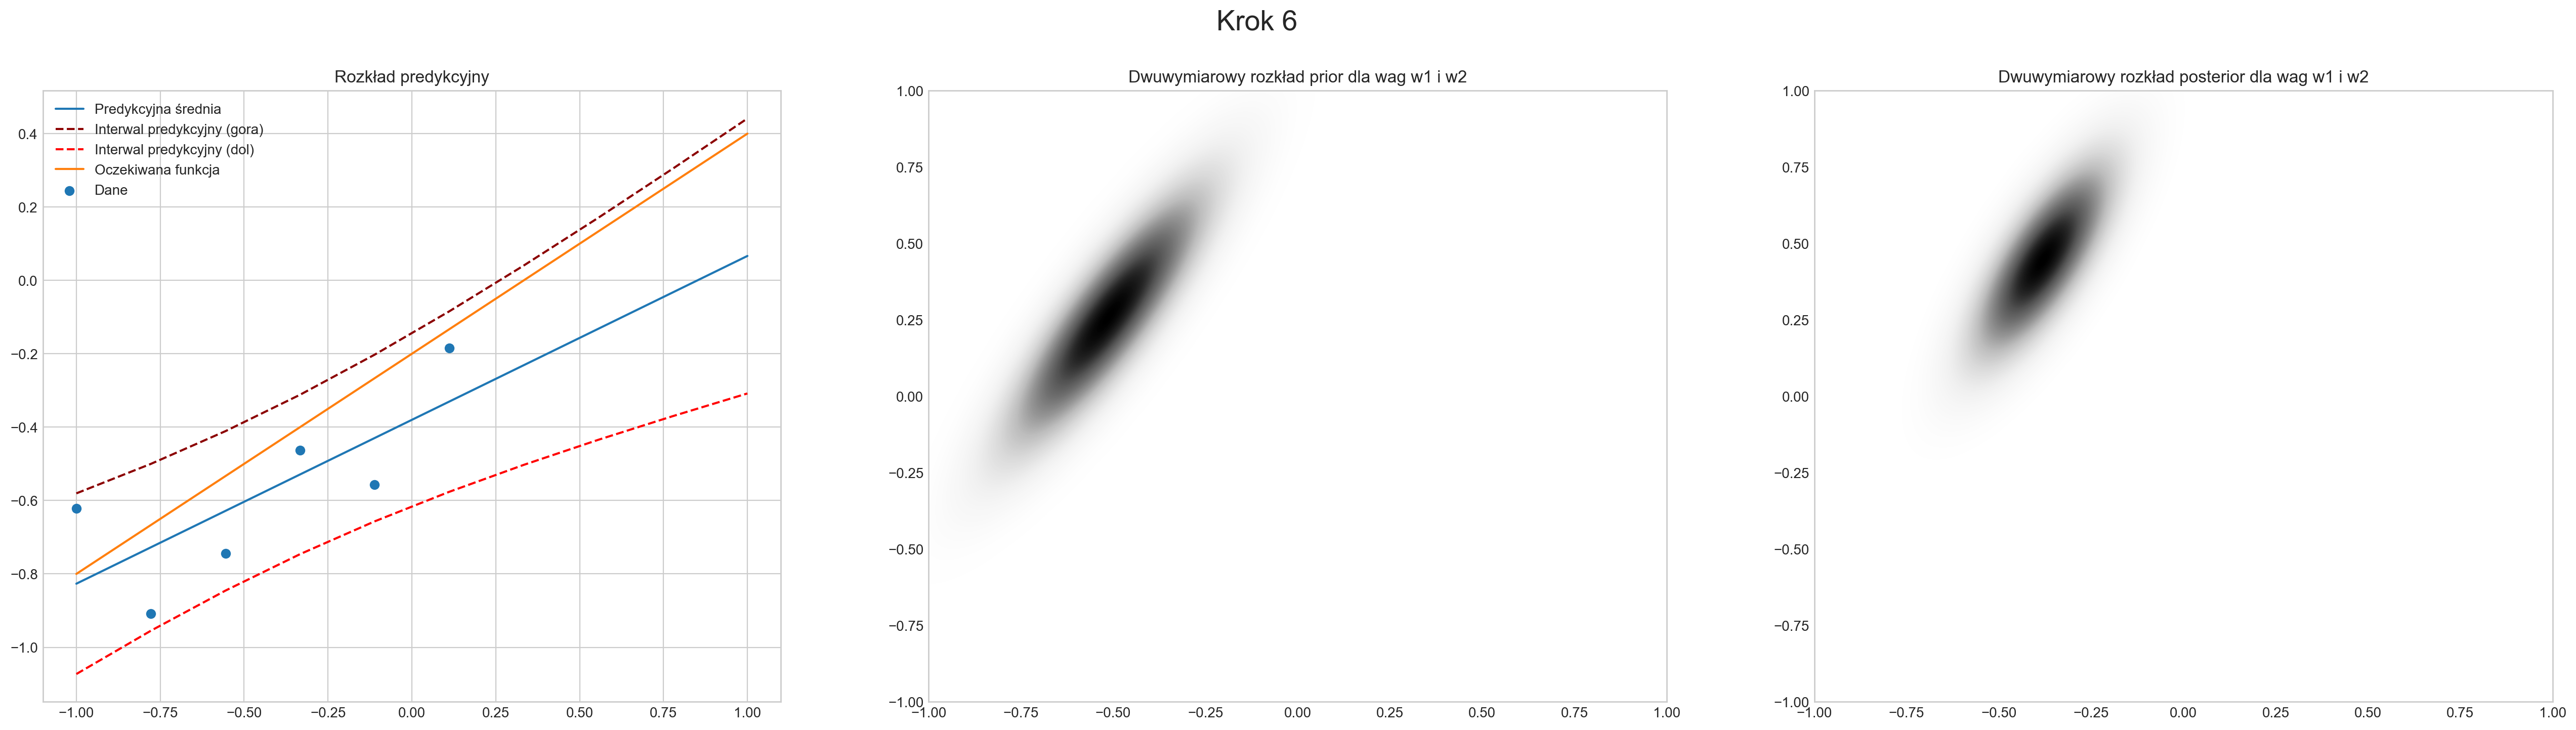

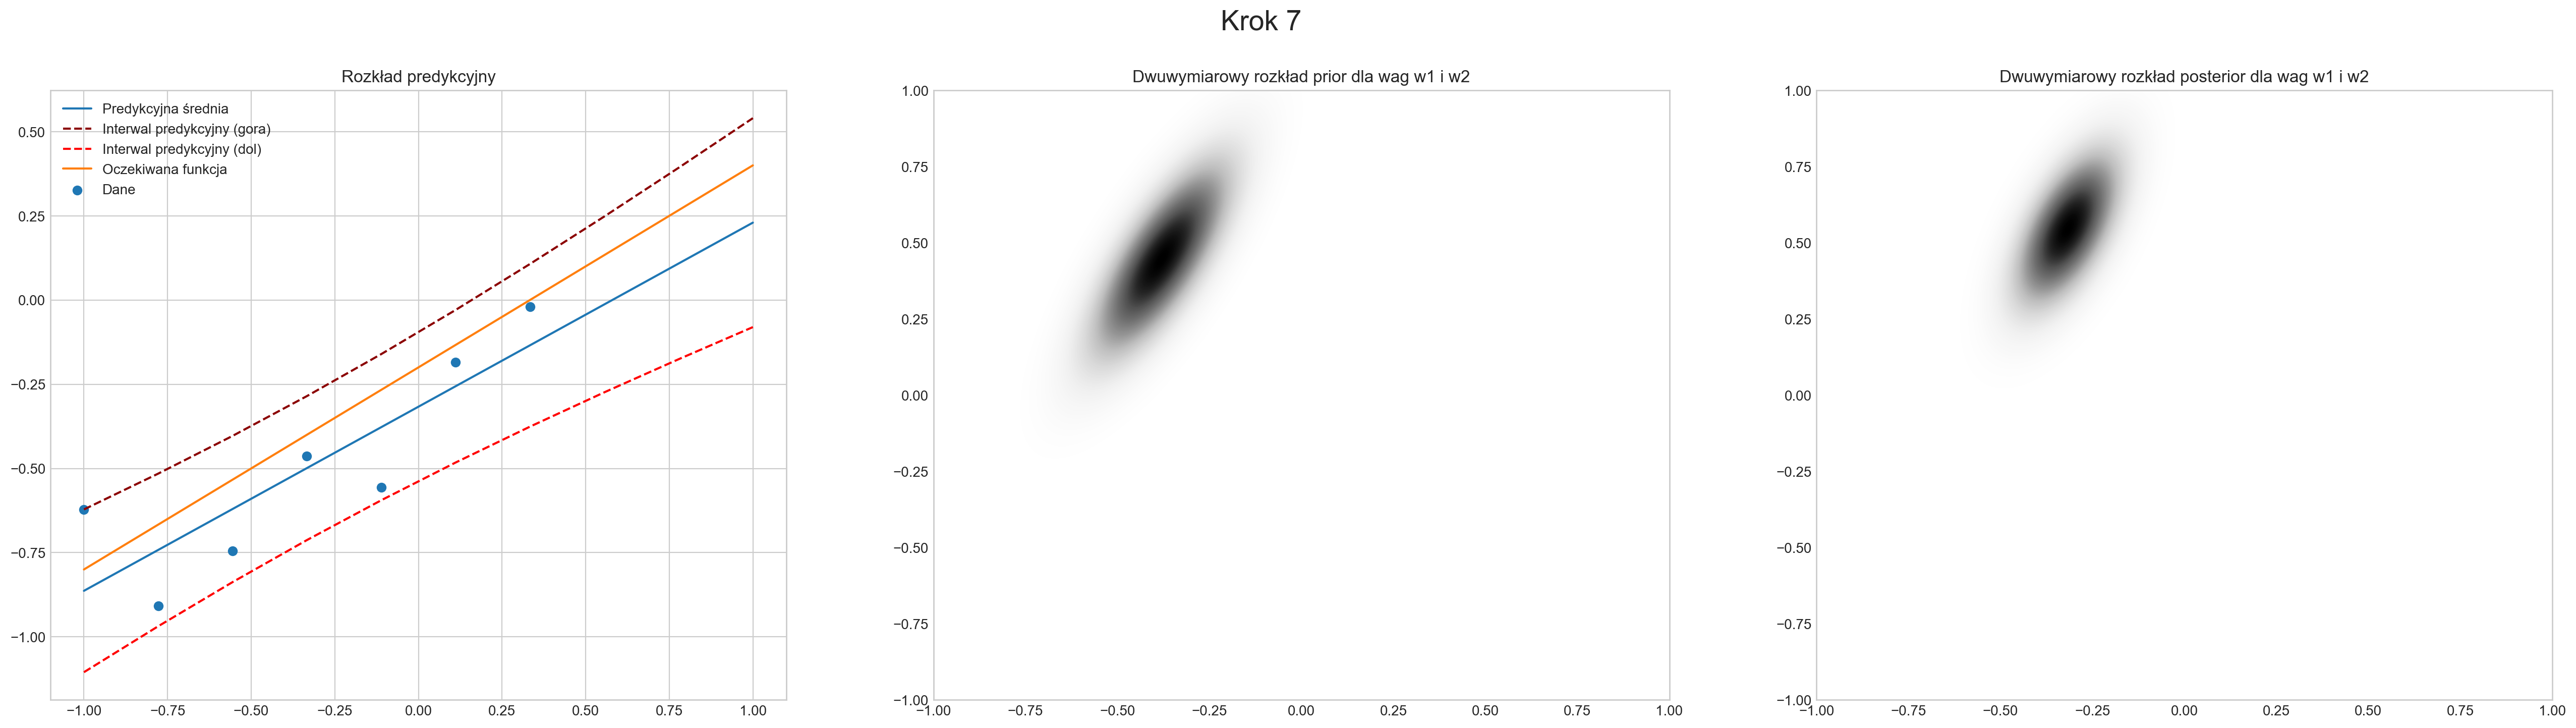

In [49]:
linear_bayes_2 = BayesianLinearRegression(n_features=2, beta=25, alpha=2)

linspace = np.linspace(-1, 1, 500)
grid = np.dstack(np.meshgrid(linspace, linspace))

def prediction_distribution(fig, i):
    ax_3 = fig.add_subplot(1, 3, 1)
    ax_3.plot(Xy[0], [linear_bayes_2.predict(np.array([1, x])).mean() for x in Xy[0]], label="Predykcyjna średnia")
    prediction = [(linear_bayes_2.predict(np.array([1, x])).mean(), linear_bayes_2.predict(np.array([1, x])).std()) for x in Xy[0]]
    ax_3.plot(Xy[0], [(a + b) for (a, b) in prediction], linestyle='--', color='darkred', label="Interwal predykcyjny (gora)")
    ax_3.plot(Xy[0], [(a - b) for (a, b) in prediction], linestyle='--', color='red', label="Interwal predykcyjny (dol)")
    ax_3.plot(Xy[0], [-0.2 + 0.6 * x for x in Xy[0]], label="Oczekiwana funkcja")
    ax_3.scatter(Xy[0][:i + 1], Xy[1][:i + 1], label="Dane")
    ax_3.legend()
    fig.suptitle(f'Krok {i + 1}', fontsize=20)
    ax_3.title.set_text("Rozkład predykcyjny")

def prior(fig, xi, yi):
    ax_1 = fig.add_subplot(1, 3, 2)
    ax_1.contourf(linspace, linspace, linear_bayes_2.weights_dist.pdf(grid), 500)
    ax_1.title.set_text("Dwuwymiarowy rozkład prior dla wag w1 i w2")
    linear_bayes_2.learn(np.array([1, xi]), yi)

def posterior(fig):
    ax = fig.add_subplot(1, 3, 3)
    ax.contourf(linspace, linspace, linear_bayes_2.weights_dist.pdf(grid), 500)
    ax.title.set_text("Dwuwymiarowy rozkład posterior dla wag w1 i w2")

def point_step(i, xi, yi):
    fig = plt.figure(figsize=(32, 8), dpi=200)
    prior(fig, xi, yi)
    posterior(fig)
    prediction_distribution(fig, i)
    plt.show()

def run_steps(n):
  [point_step(i, xi, yi) for i, (xi, yi) in enumerate(zip(*Xy)) if i < n]

run_steps(7)

### Jak zmienia się kształt rozkładu posterior wraz z dodawaniem kolejnych punktów?
Widać, że początkowa 'chmura' zajmuje cały wykres, a po siódmym kroku jest niewielkim wycinkiem.
Dodawanie nowych punktów sprawia, że wariancja posterior zmiejsza się, co oznacza, że grid poszukiwań zmniejsza swój rozmiar zbliżając się do prawidłowej wartości.